# Elenco dei documenti contenuti nella cartella british_library

In [1]:
import os

elenco_documenti = []

for root, directories, files in os.walk('british_library/'):
    for file in files:
        elenco_documenti.append(os.path.join(root, file))
        
elenco_documenti.sort()

for elemento in elenco_documenti:
    print(elemento)

british_library/Readme - Charlotte Bronte.txt
british_library/british_library_catalogue_dataset_tc.pdf
british_library/classification.csv
british_library/names.csv
british_library/records.csv
british_library/titles.csv
british_library/topics.csv


# Registrazioni bibliografiche

In [2]:
import pandas as pd

dfRCD = pd.read_csv('british_library/records.csv')

dfRCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BL record ID                  1281 non-null   object
 1   Type of resource              1281 non-null   object
 2   Content type                  1249 non-null   object
 3   Material type                 1245 non-null   object
 4   BNB number                    695 non-null    object
 5   Archival Resource Key         32 non-null     object
 6   ISBN                          781 non-null    object
 7   Name                          1154 non-null   object
 8   Dates associated with name    837 non-null    object
 9   Type of name                  1154 non-null   object
 10  Role                          260 non-null    object
 11  All names                     1269 non-null   object
 12  Title                         1262 non-null   object
 13  Variant titles    

In [13]:
pd.set_option('display.max_columns', None)

dfRCD.head()

,BL record ID,Type of resource,Content type,Material type,BNB number,Archival Resource Key,ISBN,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,Country of publication,Place of publication,Publisher,Date of creation/publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,Provenance,anno,year
0,000059000,Monograph,Language material ; Text,Volume,NaN,NaN,9780333136553,NaN,NaN,NaN,NaN,"Allott, Miriam Farris [person]",Charlotte Brontë: Jane Eyre and Villette : a c...,NaN,Casebook series,NaN,England,London,Macmillan,1973,NaN,"254 pages, 21 cm",NaN,X.989/23971,"Brontë, Charlotte, 1816-1855",NaN,English,bibliography pages 243-248,NaN,1973,1973
1,000144684,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Gaskell, Elizabeth Cleghorn, 1810-1865 [person...",Pride and prejudice,Cranford ; Jane Eyre,NaN,NaN,England ; Scotland,Glasgow ; London,Collins,1934,NaN,"3 parts, 8°",NaN,12602.s.33,NaN,NaN,English,NaN,NaN,1934,1934
2,000171772,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,"Bailey, Priscilla",NaN,person,NaN,"Bailey, Priscilla [person]","Charlotte Brontë [With illustrations, includin...",NaN,'Women of Renown' Series,NaN,England,London,Newnes,1953,NaN,48 pages (8°),NaN,W.P.b.381/1,"Brontë, Charlotte, 1816-1855",NaN,NaN,NaN,NaN,1953,1953
3,000236139,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,"Bayne, Peter",1830-1896,person,NaN,"Bayne, Peter, 1830-1896 [person]",Two great englishwomen : Mrs. Browning & Charl...,NaN,NaN,NaN,England,London,J. Clarke,1880,NaN,"lxxviii, 340 pages (8°)",NaN,11840.e.23,"Browning, Elizabeth Barrett, 1806-1861 ; Bront...",NaN,English,'The essay on poetry is published for the firs...,NaN,1880,1880
4,000259280,Monograph,Language material ; Text,Volume,NaN,NaN,NaN,"Brontë, Charlotte",1816-1855,person,NaN,"Brontë, Charlotte, 1816-1855 [person]",Jane Eyre : an autobiography,NaN,NaN,NaN,England,London,"Smith, Elder",1847,NaN,"3 volumes, 20 cm",NaN,C.70.d.13,NaN,NaN,English,NaN,NaN,1847,1847


# Distribuzione delle registrazioni per tipo di materiale

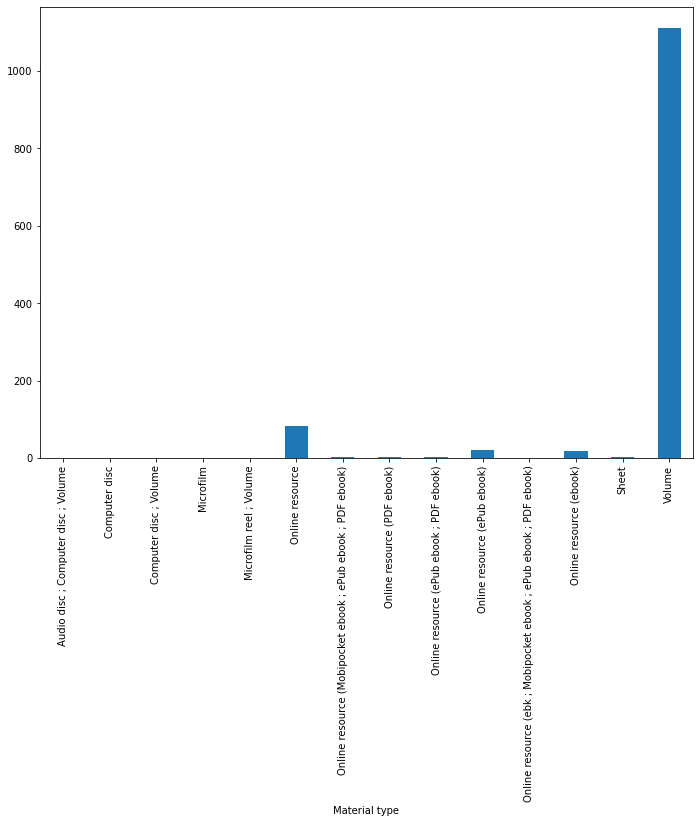

In [25]:
series = dfRCD.groupby(['Material type']).size()

series.plot.bar(figsize = (11.7, 8.3))

# Distribuzione delle registrazioni per data di pubblicazione

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f864202b910>]],
      dtype=object)

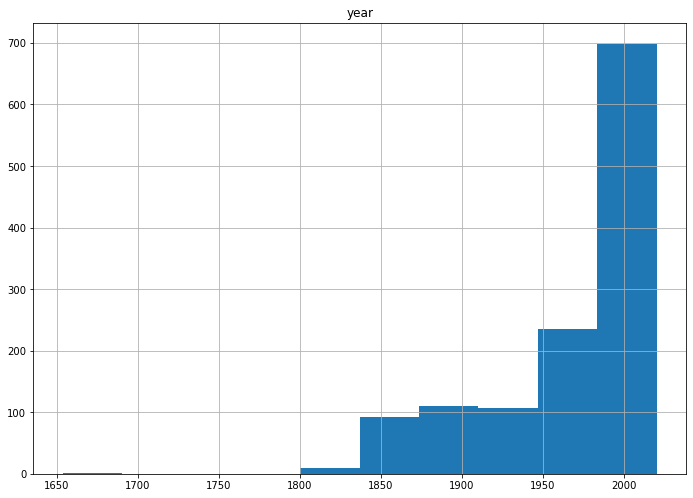

In [18]:
def anno(date):
    if type(date) == float:
        return 0
    if date[0:4].isnumeric():
        return int(date[0:4])
    return 0
    
dfRCD['year'] = dfRCD.apply(lambda x: anno(x['Date of creation/publication']), axis = 1)

dfTMP = dfRCD[dfRCD['year'] != 0]

dfTMP.hist(column = 'year', figsize = (11.7, 8.3))

In [20]:
dfTMP['year'].describe()

count    1255.000000
mean     1969.364940
std        52.064881
min      1654.000000
25%      1945.000000
50%      1991.000000
75%      2010.000000
max      2020.000000
Name: year, dtype: float64

In [23]:
dfRCD.sort_values(by = ['year'], inplace = True)

dfTMP = dfRCD[dfRCD['year'] != 0]

dfTMP.head()

,BL record ID,Type of resource,Content type,Material type,BNB number,Archival Resource Key,ISBN,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,Country of publication,Place of publication,Publisher,Date of creation/publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,Provenance,anno,year
1250,032-001984887,Fonds. Archives and Manuscripts,NaN,NaN,NaN,ark:/81055/vdc_100000000057.0x0002f8,NaN,NaN,NaN,NaN,NaN,"Attwood, Thomas, composer and organist, 1765-1...","MISCELLANEOUS original letters, etc.:-. A. Let...",NaN,NaN,NaN,NaN,NaN,NaN,1654-1853,NaN,1 volume ; Paper. Small Folio,NaN,Western Manuscripts. Egerton MS 2829,"Brontë, Charlotte, author, 1816-1855 ; Canons ...",NaN,English ; French,"includes:. ff. 1, 3 Charles II of England: Let...",NaN,1654,1654
1259,040-001959829,File. Archives and Manuscripts,NaN,NaN,NaN,ark:/81055/vdc_100000000771.0x00023c,NaN,"Millar, Eric George, DLitt, Keeper of Manuscri...",1887-1966,person,author,"Abbey, Edwin Austin, RA [author] ; Albani, Mar...","MILLAR BEQUEST. Vols. XC, XCI. Autograph colle...",NaN,NaN,NaN,NaN,NaN,NaN,1689-1937,NaN,2 items,NaN,Western Manuscripts. Add MS 54316-54317,"Army of England ; Brontë, Charlotte, author, 1...",NaN,English ; French ; German ; Italian,"Some French, German and Italian . See BMQ, xxx...",NaN,1689,1689
1262,040-001978233,File. Archives and Manuscripts,NaN,NaN,NaN,ark:/81055/vdc_100000001408.0x00027b,NaN,"Brontë, Charlotte, author",1816-1855,person,author,"Brontë, Charlotte, author, 1816-1855 [author]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1829,NaN,1 item,NaN,Western Manuscripts. Ashley MS 156,NaN,NaN,English,''The Search after Hapiness'' (sic): a tale wr...,NaN,1829,1829
1263,040-001978234,File. Archives and Manuscripts,NaN,NaN,NaN,ark:/81055/vdc_100000001408.0x00027c,NaN,"Brontë, Charlotte, author",1816-1855,person,author,"Brontë, Charlotte, author, 1816-1855 [author] ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1829,NaN,1 item,NaN,Western Manuscripts. Ashley MS 157,NaN,NaN,English,''Blackwoods Young Men''s Magazine'' (First Se...,NaN,1829,1829
1277,040-001985460,File. Archives and Manuscripts,NaN,NaN,NaN,ark:/81055/vdc_100000000158.0x000139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1830-1855,NaN,1 item,NaN,Western Manuscripts. Egerton MS 3268 B,"Brontë, Charlotte, author, 1816-1855 ; Stead, ...",NaN,English,"Lock of Charlotte Brontë's hair, cut at her de...",NaN,1830,1830


# Esercizi

Distribuzione delle registrazioni nel documento titles.csv per lingua.